## Credit model 

* There is a farmer who has access to $S$ = Rs 5000 of cash, with which he can plant some crops. 

* Assume that at full production, in one period (say 1 year), he makes a profit of Rs 2500, so the cash becomes $1.5*S$ = Rs 7500.

* Productivity factor $beta$ = 1.5


In [ ]:
from random import randrange
from matplotlib import pyplot as plt

In [ ]:
def plot_2(y1, y2, xl, t1, t2):
  fig,ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax1.plot(y1, linestyle = 'dotted', color='r')
  ax2.plot(y2, linestyle = 'dashed', color='b')
  ax1.set_xlabel(xl)
  ax1.set_ylabel(t1, color='r')
  ax2.set_ylabel(t2, color='b')
  plt.show()

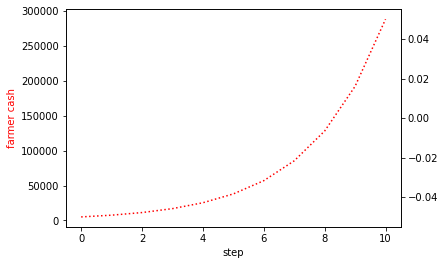

In [ ]:
S = 5000
numPeriods = 10
beta = 1.5

y1 = [S]
y2 = []

for i in range(0,numPeriods):
  S = S*beta
  y1.append(S)  

plot_2(y1,y2,'step','farmer cash','')

### Taking a loan to improve the income

* Say the farmer now wants to increase his income by taking a loan $L$.

* If the interest rate $r$ on the loan is less than the productivity factor beta,
then there will be a net additional income of $(beta - (1+r))*L$

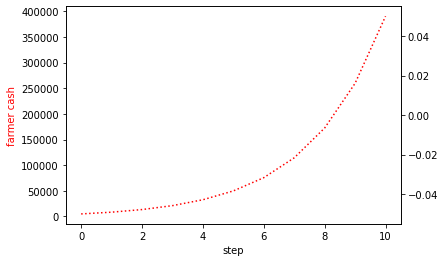

In [ ]:
S = 5000
numPeriods = 10
beta = 1.5

L = 3000
r = 0.2

y1 = [S]
y2 = []

for i in range(0,numPeriods):
  S = (S+L)*beta - (1+r)*L
  y1.append(S)  

plot_2(y1,y2,'step','farmer cash','')

### How much should the farmer borrow?

* Each unit increase in $L$ gives the farmer an additional $(beta - (1+r))$ units of income
* there should be no limit to the amount of loan the farmer should take


## But, is the lender willing to lend?

* Let us say the lender is happily willing to lend at the rate of $r$.

* Then the lender's profit in a period is $r*L$, which keeps increasing with increasing $L$

* So, in principle the lender should be willing to lend any amount of money! 
* Not realistic? We will revisit this later

* For now, assume that the lender is worried a bit about lending larger and larger amounts of money

* So charges additional interest per unit of $L$ at the rate of $k$
  * i.e. the interest rate is fixed at $r + k*L$

* As long as the lender is convinced that the farmer will repay the loan (we will come back to this later)
  * the larger the value of $L$ the larger the lender's return

### But then is the borrower willing to borrow more?

* The additional interest rate $k*L$ could cross the additional income $beta - (1 + r)$ for some $L$

* at which point the farmer has no incentive to borrow more money. 

* This happens at $L = (beta - 1 - r)/k$.

* But should the farmer take as large a loan as $(beta - 1 - r)/k$ ?

* The farmer's profit is $(S+L) * beta - (1 + r + k*L) * L$

* We can optimise this with respect to $L$ to get $Lmax = \frac{beta - 1 - r}{2*k}$ 

* The optimum payoff is $S * beta + \frac{beta - 1 - r}{2} * Lmax$

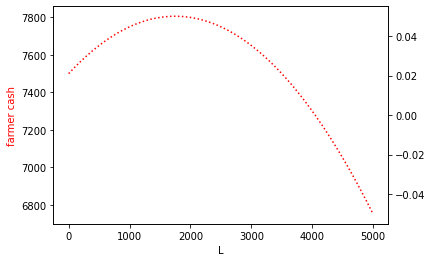

Lmax= 1750
Max payoff =  7806.25
7806.25


In [ ]:
S = 5000
numPeriods = 10
beta = 1.5

r = 0.15
k = 0.0001

y1 = []
y2 = []

for L in range(0,5000):
  X = (S+L)*beta - (1 + r + k*L)*L
  y1.append(X)

plot_2(y1,y2,'L','farmer cash','')

Lmax = round((beta - 1 - r)/(2*k))
print ("Lmax=", Lmax)
print ("Max payoff = ", (S+Lmax)*beta - (1 + r + k*Lmax)*Lmax)
print (S*beta + (beta - 1 - r)*Lmax/2)

## Now suppose that there is a sizeable probability of default

* About $d$% of the farmers have been defaulting over the last few years. 
  * The lender knows this. 

* So lender's payoff is now $(1-d)*(r + k*L)*L - d*L$
  * since with probability $(1-d)$ lender will encounter a paying borrower (with profit of $r + kL$) 
  * and with probability $d$ will meet a defaulting borrower (with loss L).

* But still, as long as $(1-d)*(r + k*L) > d$, lender keeps giving higher loans.

* This will hold as long as the ratio of defaulters to non defaulters $\frac{d}{1-d} < r + k*L$.

* If the default rate is say $10$%, then $\frac{d}{1-d} = \frac{0.1}{0.9} = 0.11$. So the interest rate at which lender can lend has to be at least $0.11$.

* However, if the default rate is say 20%, then $\frac{d}{1-d} = \frac{0.2}{0.8} = 0.25$, which increases the interest rate. 

* At some high enough default rate, the interest rate will become so high, that the non-defaulting borrower is not interested in borrowing, and only the defaulting borrowers will be left in the market. 
  * Problem of "lemons" : the bad drive the good out of the market

* So, more realistically, the lender will have to exit the lending market if there is sizeable probability of default

### ... but what is the payoff of the defaulter?

* Defaulter made the entire $L$ as profit! 

* So, defaulter is better off taking a very high value of loan and defaulting.

* We assumed that both the non-defaulter and defaulter will take the same $L$.

* This may not be the case. 

* In fact, while the non-defaulter wants to restrict the loan to a small size ($L = \frac{beta - 1 - r}{2*k}$), 
  * the defaulter will be willing to take a much bigger loan.

* The lender could read the size of the loan demanded as a "signal" to discriminate between the defaulter and non-defaulter, and refuse to lend to the defaulter!

* To prevent this, the defaulter also takes the same loan size $L$, so the lender cannot discern between the two.

* So, now the defaulter has additional payoff of $Lmax$ while the non-defaulter has additional payoff of $\frac{beta - 1 - r}{2} * Lmax$
  * For $beta = 1.5, r = 0.15$, the payoff of non-defaulter is $0.175*Lmax$ which is considerably lower than the defaulter
  * So the defaulter is better off and will **increase** in the population

* This will cause the interest rate to increase (as seen earlier), causing the non-defaulter to drop out of the market, leaving only the defaulter.

* Knowing this, the lender will choose not to enter the lending market


## Dissuading default through collateral

* The lender could also ask for collateral to prevent intentional defaults

* Say the lender asks for a collateral $C$, which will be cashed when the borrower defaults.

* Now the defaulter's payoff becomes $L - C$, and if $C > L$, then there is no incentive to intentionally default.

* Since the non-defaulter is not going to have his collateral cashed, it does not make an impact on the payoff of the non-defaulter. 

* The lender's payoff now increases to $(1-d)*(r + k*L)*L + d*(C - L)$, which is higher than the non-collateral case by $d*C$

* The lender is now better of lending as much as possible, since profit is to be made whichever scenario occurs - default or no default.

* Perversely, the lender actually makes more money if the borrower defaults! 

* So, the lender could give **much higher loans and induce a default** to achieve the higher payoff. 

For the model below, we assume that the default percentage $d$ is now entirely because of unfortunate business circumstances.


### What is the  borrowers expected payoff and optimal loan amount now?

* Borrower can default with probability $d$ due to adverse business circumstances

* Borrower's payoff remains the same if there is no default.

* If there is a default (due to unfortunate business circumstances, they could not produce anything from the farm), then the payoff decreases by $C - L$. 

* So, the expected payoff of borrower is: 
$(1-d)*[(S+L) * beta - (1 + r + k*L) * L] - d*(C-L)$

* We can optimise this for $L$, to get $Lmax = \frac{beta - 1 - r + \frac{d}{1-d}}{2*k}$ 

* It looks strange that the loan amount actually increased when there was a higher chance of default.

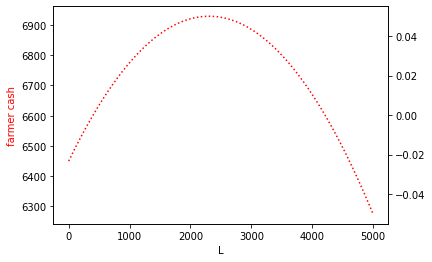

Lmax= 2306
Max payoff =  6900.625


In [ ]:
S = 5000
r = 0.15
k = 0.0001
C = 3000
d = 0.1

y1 = []
y2 = []

for L in range(0,5000):
  X = (1-d)*((S+L)*beta - (1 + r + k*L)*L) - d*(C-L)
  y1.append(X)

plot_2(y1,y2,'L','farmer cash','')

print ("Lmax=", round((beta - 1 - r + d/(1-d))/(2*k)))
print ("Max payoff = ", (1-d)*((S+Lmax)*beta - (1 + r + k*Lmax)*Lmax) - d*(C-Lmax))

## Good borrowers and bad borrowers

* Let us make the problem a bit more interesting. 

* Assume that the value of the collateral $C$ that is being pledged with the bank is not clearly known to the lender. 
  * The borrower and lender may have different valuations for the collateral.

* Bad borrower intends to default and cash in on the difference $L - C_{bad}$.

* The good borrower's collateral $C$ will be valued at the same level by the lender, whereas the bad borrower's collateral $C_{bad} < C$ is mistakenly valued at the same level as $C$.

* Lender knows from experience that there could be a certain percentage of bad borrowers in society (say $x$%), but cannot differentiate a good borrower from a bad one.

* Lender's payoff is now $(1-x)*[(1−d)∗(r+k∗L)*L + d*(C-L)]-x∗(L−C_{bad})$

* Lender is willing to lend more only if the ratio of bad to good borrowers $\frac{x}{1-x}$ is less than $\frac{(1-d)*(r+k*L)*L+d*(C-L)}{L-C_{bad}}$. 

  * which says that the ratio of bad borrowers to good borrowers has to be less than the ratio of good borrower payoff to bad borrower loss (let us call this Z).
  * then $\frac{x}{1-x} < Z$ which implies $x < \frac{Z}{1+Z}$

* Consider the case where $d=0, r=0.15, k=0.0001$, with $L = 1000$ and $C_{bad} = 500$.
  * Then Z = $0.25*1000/500 = 0.5$, which means that we can tolerate upto $0.5/1.5 = 33\%$ bad borrowers
  * For $L=1500$, Z = $0.3*1500/1000 = 0.45$, which means we can tolerate only $0.45/1.45 = 31\%$ bad borrowers
  * With increasing $L$, we are able to tolerate smaller and smaller number of bad borrowers
  * Since we dont know the number of bad borrowers, peg the value of $L$ really low to avoid risk

* But wait ... there is something more interesting happening here. 

* If the loan amount $L$ is chosen lower than $C_{bad}$ then there is no incentive for the bad borrower to enter the market, so will drop out.

* The good borrower is happy to take even a small loan.

* So, the lender could peg the loan at a conservative estimate of collateral $C_{bad}$ (to drive the bad borrower out), 
  * even though the actual borrower left in the market is the good borrower, whose collateral $C$ is much higher than $C_{bad}$.

* But all this leaves both the good borrower and the lender less than happy. 
  * They have to both settle for a much smaller loan ticket size, simply because of the existence of nuisance bad borrowers.


## Multi period model based on default history

* Now assume that the lender uses past information of default to decide the loan size. 

* If the borrower has defaulted in the last period, the loan size will only be $C_{bad}$, else it can be the much higher value $C$ if the borrower wants it. 
  * It is like a tit-for-tat strategy

* Note that the lender has no way of discriminating whether the borrower is good or bad, so the good borrower who defaults will also be similarly punished.

* Note that in this model, only the lender is learning and responding
  * There is no path dependent action by the borrower

* Let us see how such a system will evolve. 


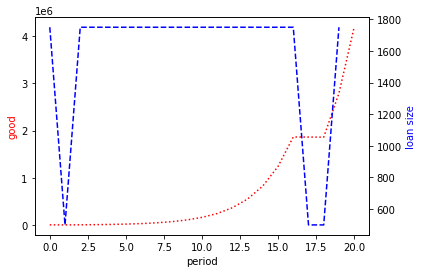

PNNNNNNNNNNNNNNNPPNN


In [ ]:
numPeriods = 20
G = 5000
B = 0
r = 0.15
k = 0.0001
Cbad = 500
C = 3000
d = 0.2
x = 0.2

y1 = [G]
y2 = []
a = []
punishG = False

for i in range(numPeriods):
  if punishG:
    LG = Cbad
  else:
    LG = (beta - 1 - r)/(2*k)


  if randrange(100) < round(d*100):
    G = G - C + LG
    punishG = True
    a.append('P')
  else:
    G = (G+LG)*beta - (1 + r + k*LG)*LG
    punishG = False
    a.append('N')
  
  y1.append(G)
  y2.append(LG)


plot_2(y1,y2,'period','good','loan size')
print ("".join(a))

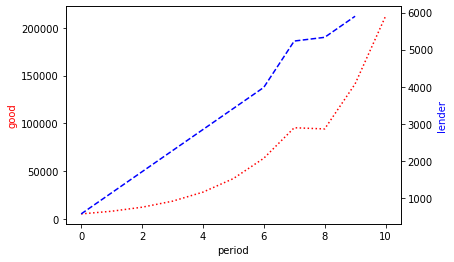

NNNNNNNPNN


In [ ]:
numPeriods = 20
G = 5000
B = 0
r = 0.15
k = 0.0001
Cbad = 500
C = 3000
d = 0.2
x = 0.1

y1 = [G]
y2 = []
a = []
punishG = False
LP = 0

for i in range(numPeriods):
  if punishG:
    LG = Cbad
  else:
    LG = (beta - 1 - r)/(2*k)

  if randrange(100) < round(d*100):
    G = G - C + LG
    punishG = True
    a.append('P')
    LPR = C - LG
  else:
    G = (G+LG)*beta - (1 + r + k*LG)*LG
    punishG = False
    a.append('N')
    LPR = (r + k * LG) * LG
  
  if randrange(100) < round(x*100):
    LP = LP - LG + Cbad
  else:
    LP = LP + LPR

  y1.append(G)
  y2.append(LP)

plot_2(y1,y2,'period','good','lender')
print ("".join(a))

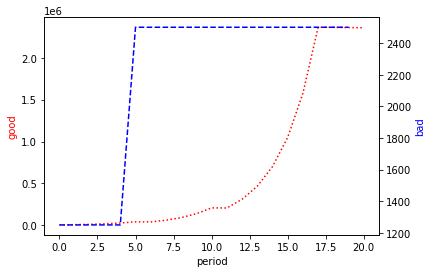

NNNNNPNNNNPNNNNNNPPP
BGGGGBGGGGGGGGGGGGGG


In [ ]:
numPeriods = 20
G = 5000
B = 0
r = 0.15
k = 0.0001
Cbad = 500
C = 3000
d = 0.2
x = 0.1

y1 = [G]
y2 = []
a = []
b = []
punishG = False
LP = 0
B = 0

for i in range(numPeriods):
  if punishG:
    LG = Cbad
  else:
    LG = (beta - 1 - r)/(2*k)

  if randrange(100) < round(d*100):
    G = G - C + LG
    punishG = True
    a.append('P')
    LPR = C - LG
  else:
    G = (G+LG)*beta - (1 + r + k*LG)*LG
    punishG = False
    a.append('N')
    LPR = (r + k * LG) * LG
  
  if randrange(100) < round(x*100):
    LPT = Cbad - LG
    LB = -LPT
    b.append('B')
  else:
    LPT = LPR
    b.append('G')
    LB = 0

  LP = LP + LPT
  B = B + LB

  y1.append(G)
  y2.append(B)

plot_2(y1,y2,'period','good','bad')
print ("".join(a))
print ("".join(b))

### Let us now try to model population evolution

* The percentage of bad borrowers (x) increases or decreases based on relative fitness

* We determine fitness by using the cumulative payoff

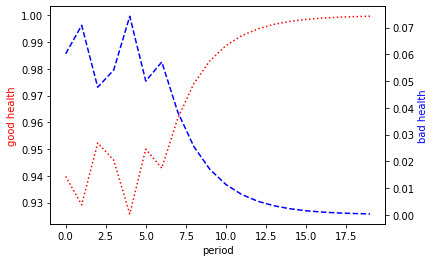

NPNPPNPNNNNNNNNNNNNN
GGGGGGGGGGGGGGGGGGGG


In [ ]:
numPeriods = 20
G = 5000
B = 0
r = 0.15
k = 0.0001
Cbad = 500
C = 3000
d = 0.2
x = 0.1

y1 = []
y2 = []
a = []
b = []
punishG = False
LP = 0
B = Cbad

for i in range(numPeriods):
  if punishG:
    LG = Cbad
  else:
    LG = (beta - 1 - r)/(2*k)

  if randrange(100) < round(d*100):
    G = G - C + LG
    punishG = True
    a.append('P')
    LPR = C - LG
  else:
    G = (G+LG)*beta - (1 + r + k*LG)*LG
    punishG = False
    a.append('N')
    LPR = (r + k * LG) * LG
  
  if randrange(100) < round(x*100):
    LPT = Cbad - LG
    LB = -LPT
    b.append('B')
  else:
    LPT = LPR
    b.append('G')
    LB = 0

  LP = LP + LPT
  B = B + LB

  if B > 0:
    x = B/(B+G)
  else:
    x = 0

  y1.append(1-x)
  y2.append(x)

plot_2(y1,y2,'period','good health','bad health')
print ("".join(a))
print ("".join(b))